In [ ]:
'''
【项目11】  国产烂片深度揭秘

作业要求
1、读取数据，以“豆瓣评分”为标准，看看电影评分分布，及烂片情况
要求：
① 读取数据“moviedata.xlsx”
② 查看“豆瓣评分”数据分布，绘制直方图、箱型图
③ 判断“豆瓣评”数据是否符合正态分布
④ 如果符合正态分布，这里以上四分位数（该样本中所有数值由小到大排列后第25%的数字）评分为“烂片标准”
⑤ 筛选出烂片数据，并做排名，找到TOP20
提示：
① 读取数据之后去除缺失值
② 这里可以用ks检验来判断数据是否符合正态分布

2、什么题材的电影烂片最多？
要求：
① 按照“类型”字段分类，筛选不同电影属于什么题材
② 整理数据，按照“题材”汇总，查看不同题材的烂片比例，并选取TOP20
③ 将得到的题材烂片比例TOP20制作散点图 → 横坐标为“题材”类型，纵坐标为烂片比例，点大小为样本数量
   ** 用bokeh制图
   ** 按照烂片比例做降序排列
提示：
① 删除“类型”字段空值的数据
② 由于一个电影“类型”会有多个，这里需要将一个电影每个“类型”都识别出来，在统计某个题材时都需要计算，例如：
   如果一个电影的类型为：“喜剧/爱情”，则在计算“喜剧”、“爱情”题材的烂片比例时，都需要将该电影算上
③ 注意类型字段中，要删除空格字符
④ bokeh图设置点大小，这里通过开方减小数据差距 → size = count**0.5*系数

3、和什么国家合拍更可能产生烂片？
要求：
① 按照“制片国家/地区”字段分类，筛选不同电影的制片地
② 整理数据，按照“题材”汇总，查看不同题材的烂片比例，并选取TOP20
提示：
① 删除“制片国家/地区”字段空值的数据
② 删除“制片国家/地区”中不包括“中国大陆”的数据
③ 制片地删除“中国大陆”、“中国”、“台湾”、“香港”等噪音数据
④ 筛选合作电影大于等于3部以上的国家

4、卡司数量是否和烂片有关？
要求：
① 计算每部电影的主演人数
② 按照主演人数分类，并统计烂片率
   ** 分类：'1-2人','3-4人','5-6人','7-9人','10以上'
③ 查看烂片比例最高的演员TOP20
提示：
① 通过“主演”字段内做分列来计算主演人数
② 需要分别统计不同主演人数的电影数量及烂片数量，再计算烂片比例
③ 这里可以按照明星再查看一下他们的烂片率，比如：吴亦凡、杨幂、黄晓明、甄子丹、刘亦菲、范冰冰....

5、不同导演每年电影产量情况是如何的？
要求：
① 通过“上映日期”筛选出每个电影的上映年份
② 查看不同导演的烂片比例、这里去除掉拍过10次电影以下的导演
③ 查看不同导演每年的电影产量制作散点图 → 横坐标为年份，纵坐标为每年电影平均分，点大小该年电影数量
   ** 用bokeh制图
   ** 横坐标限定为2007-2017年
   ** 绘制散点图只需要用产出过烂片的导演数据
提示：
① 注意要删除“上映日期”中的空格字符
② 绘制图表时，分开建立数据绘制

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

import warnings
warnings.filterwarnings('ignore') 
# 不发出警告

from bokeh.io import output_notebook
output_notebook()
# 导入notebook绘图模块

from bokeh.plotting import figure,show
from bokeh.models import ColumnDataSource,HoverTool
# 导入图表绘制、图标展示模块
# 导入ColumnDataSource模块

Loading BokehJS ...

In [ ]:
'''
1、读取数据，以“豆瓣评分”为标准，看看电影评分分布，及烂片情况
要求：
① 读取数据“moviedata.xlsx”
② 查看“豆瓣评分”数据分布，绘制直方图、箱型图
③ 判断“豆瓣评”数据是否符合正态分布
④ 如果符合正态分布，这里以上四分位数（该样本中所有数值由小到大排列后第25%的数字）评分为“烂片标准”
⑤ 筛选出烂片数据，并做排名，找到TOP20
提示：
① 读取数据之后去除缺失值
② 这里可以用ks检验来判断数据是否符合正态分布

'''

In [2]:
# 查看数据,数据清洗

import os
os.chdir('C:/Users/Hjx/Desktop/项目11国产烂片深度揭秘/')
# 创建工作路径

df = pd.read_excel('moviedata.xlsx')
df = df[df['豆瓣评分'] > 0]
print('初步清洗后数据量为%i条' % len(df))
# 读取数据
# 删除“豆瓣评分”小于等于0的值

df.iloc[1]
#查看数据

初步清洗后数据量为2306条


电影名称                  黑猫大旅社 黑貓大旅社
豆瓣评论数                         514
豆瓣评分                          6.8
上映日期                           不详
主演          陆奕静 / 老鄧 （夏靖庭 ） / 蔡振南
制片国家/地区                        台湾
又名                Hotel Black Cat
导演                            徐丽雯
片长                            112
类型                             剧情
编剧                            徐丽雯
语言                           台湾国语
r5                          0.102
r4                          0.332
r3                          0.453
r2                          0.091
r1                          0.022
Name: 1, dtype: object

count    2306.000000
mean        5.604250
std         1.595514
min         2.100000
25%         4.300000
50%         5.700000
75%         6.800000
max         9.300000
Name: 豆瓣评分, dtype: float64

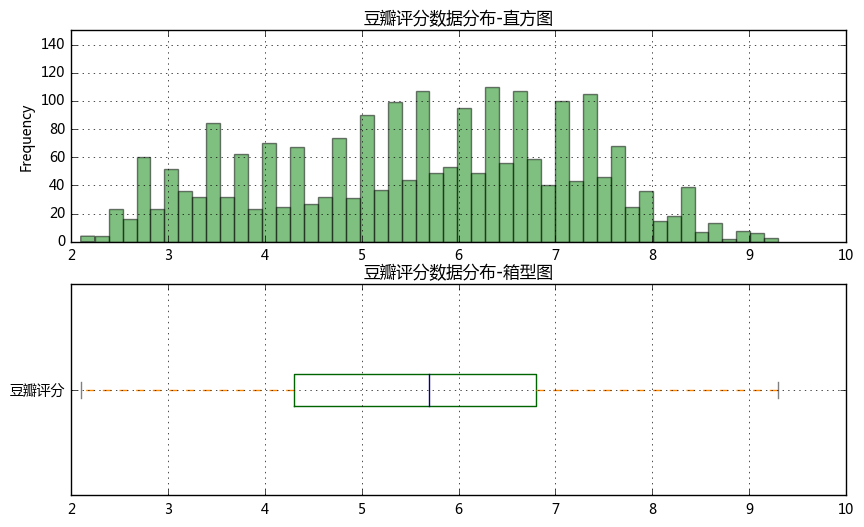

In [3]:
# 查看豆瓣评分情况

fig = plt.figure(figsize = (10,6))
plt.subplots_adjust(hspace=0.2)
# 创建绘图空间

ax1 = fig.add_subplot(2,1,1)  
df['豆瓣评分'].plot.hist(stacked=True,bins=50,color = 'green',alpha=0.5,grid=True)
plt.ylim([0,150])
plt.title('豆瓣评分数据分布-直方图')
# 绘制直方图

ax2 = fig.add_subplot(2,1,2)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
df['豆瓣评分'].plot.box(vert=False, grid = True,color = color) 
plt.title('豆瓣评分数据分布-箱型图')
# 绘制箱型图

df['豆瓣评分'].describe()

In [4]:
# 判断是否符合正态分布

from scipy import stats
# 导入相关模块

u = df['豆瓣评分'].mean()  # 计算均值
std = df['豆瓣评分'].std()  # 计算标准差
stats.kstest(df['豆瓣评分'], 'norm', (u, std))
# 这里p值大于0.05，为正态分布

# 结论
# 这里以样本数据上四分位数为烂片评判标准 → 4.3分

KstestResult(statistic=0.061493870089715519, pvalue=5.0506841597908192e-08)

In [5]:
# 筛选出烂片数据，并做排名，找到TOP20

data_lp = df[df['豆瓣评分']<4.3].reset_index()
print('数据整理后，得到烂片数据量为%i条' % len(data_lp))
# 筛选烂片数据

lp_top20 = data_lp[['电影名称','豆瓣评分','导演','主演']].sort_values(by = '豆瓣评分').iloc[:20].reset_index()
del lp_top20['index']
lp_top20
# 查看烂片top20

数据整理后，得到烂片数据量为546条


,电影名称,豆瓣评分,导演,主演
0,渡灵人,2.1,孔令杭,王磊 / 邱佩霞 / 杜冯欣怡 / 郑礼宇
1,白日杀机,2.2,张帆,张小仟 / 章宇 / 郑诺 / 亦涵
2,大震撼,2.2,崔立新,石小群 / 宫哲 / 徐爽 / 齐如意 / 姚心蕊 / 崔可法 / 卢彦西
3,戚继光英雄传,2.2,姚林 / 杨清峰 / 吴鲁光 / 沈丹冶,NaN
4,B区32号,2.3,吕建民,邓紫衣 / 唐宸禹 / 李锐
5,找个高富帅？,2.3,陈童,徐申东 / 张惠鑫 / 曲昱曈 / 王乐天 / 王妍 / 闫美伊 / 陈童 / 李飞
6,换脸新娘,2.3,林云翔,翟文斌 / 吴菲 / 褚颖颖 / 林娜
7,皇帝的新装之圣诞大明星,2.3,李霞,NaN
8,整形归来,2.4,张翔宇,苏菲 / 张乃歌 / 张慧雯
9,火星归来,2.4,刘谋峰,马诺 / 胡北 / 高森鹏 / 刘谋峰 / Edward Zee


In [ ]:
'''
2、什么题材的电影烂片最多？
要求：
① 按照“类型”字段分类，筛选不同电影属于什么题材
② 整理数据，按照“题材”汇总，查看不同题材的烂片比例，并选取TOP20
③ 将得到的题材烂片比例TOP20制作散点图 → 横坐标为“题材”类型，纵坐标为烂片比例，点大小为样本数量
   ** 用bokeh制图
   ** 按照烂片比例做降序排列
提示：
① 删除“类型”字段空值的数据
② 由于一个电影“类型”会有多个，这里需要将一个电影每个“类型”都识别出来，在统计某个题材时都需要计算，例如：
   如果一个电影的类型为：“喜剧/爱情”，则在计算“喜剧”、“爱情”题材的烂片比例时，都需要将该电影算上
③ 注意类型字段中，要删除空格字符
④ bokeh图设置点大小，这里通过开方减小数据差距 → size = count**0.5*系数

'''

In [6]:
# 筛选出所有题材类型

typelst = []
for i in df[df['类型'].notnull()]['类型'].str.replace(' ','').str.split('/'):
    typelst.extend(i)
# 取出所有电影的“类型”，并整理成列表
# 注意这里要删除“类型”中的空格字符

typelst = list(set(typelst))  
print(typelst)
# 列表去重

['喜剧', '传记', '真人秀', 'News', '运动', '科幻', '灾难', '悬疑', '爱情', '音乐', '舞台艺术', '古装', '历史', '歌舞', '纪录片', '同性', '黑色电影', '鬼怪', '恐怖', '战争', '惊悚', '西部', '冒险', '动作', '儿童', '脱口秀', '戏曲', '家庭', '犯罪', '情色', '动画', '短片', '剧情', '奇幻', '武侠']


In [7]:
# 创建函数，查看不同题材的烂片比例
# 这里要删除“类型”字段空值的数据

lst_type_lp = []
# 创建空字典、空列表

df_type = df[df['类型'].notnull()][['电影名称','豆瓣评分','类型']]
# 筛选数据

def f1(data,typei):
    dic_type_lp = {}
    datai = data[data['类型'].str.contains(typei)]             
    # 筛选数据
    lp_pre_i = len(datai[datai['豆瓣评分']<4.3])/len(datai)    
    # 计算该题材烂片比例
    dic_type_lp['typename'] = typei         
    dic_type_lp['typecount'] = len(datai)   
    dic_type_lp['type_lp_pre'] = lp_pre_i
    # 将结果记录进字典中，包括题材类型、烂片比例、样本数据数量
    return(dic_type_lp)

for i in typelst:
    dici = f1(df_type,i)
    lst_type_lp.append(dici)
# 按照题材遍历数据，得到不同题材的烂片比例

df_type_lp = pd.DataFrame(lst_type_lp)
type_lp_top20 = df_type_lp.sort_values(by = 'type_lp_pre',ascending = False).iloc[:20]
type_lp_top20
# 筛选出烂片比例TOP的题材类型

,type_lp_pre,typecount,typename
29,0.666667,12,情色
18,0.579710,69,恐怖
20,0.561856,194,惊悚
7,0.407407,216,悬疑
6,0.400000,10,灾难
22,0.376471,85,冒险
5,0.370370,27,科幻
33,0.345238,84,奇幻
0,0.341463,574,喜剧
16,0.333333,3,黑色电影


In [8]:
# bokeh制图

type_lp_top20['size'] = type_lp_top20['typecount']**0.5*2  # 设置点大小，这里通过开方减小数据差距
source = ColumnDataSource(data=type_lp_top20)
# 创建数据

lst_type = type_lp_top20['typename'].tolist()   # 设置横坐标list
hover = HoverTool(tooltips=[("数据量", "@typecount"),
                           ("烂片比例","@type_lp_pre")]) # 设置标签显示内容

p = figure(x_range=lst_type, plot_width=900, plot_height=350, title="不同电影题材烂片比例", 
           tools=[hover,'reset,xwheel_zoom,pan,crosshair,box_select'])
# 构建绘图空间

p.circle(x='typename',y='type_lp_pre',source = source, size = 'size',
         line_color = 'black',line_dash = [6,4],fill_color = 'red',fill_alpha = 0.7)
# 绘制散点图

p.xgrid.grid_line_dash = [10,4]
p.ygrid.grid_line_dash = [10,4]
# 设置其他参数

show(p)

In [ ]:
'''
3、和什么国家合拍更可能产生烂片？
要求：
① 按照“制片国家/地区”字段分类，筛选不同电影的制片地
② 整理数据，按照“题材”汇总，查看不同题材的烂片比例，并选取TOP20
提示：
① 删除“制片国家/地区”字段空值的数据
② 删除“制片国家/地区”中不包括“中国大陆”的数据
③ 制片地删除“中国大陆”、“中国”、“台湾”、“香港”等噪音数据
④ 筛选合作电影大于等于3部以上的国家

'''

In [9]:
# 筛选电影制片地
# 这里要删除“制片国家/地区”字段空值的数据
# 制片地删除“中国大陆”、“中国”、“台湾”、“香港”等噪音数据

df_loc = df[['电影名称','制片国家/地区','豆瓣评分']][df['制片国家/地区'].notnull()]
df_loc = df_loc[df_loc['制片国家/地区'].str.contains('中国大陆')]
# 筛选数据

loclst = []
for i in df_loc['制片国家/地区'].str.replace(' ','').str.split('/'):
    loclst.extend(i)
# 取出所有电影的制片地，并整理成列表
# 注意这里要删除“制片国家/地区”中的空格字符

loclst = list(set(loclst))  
loclst.remove('中国大陆')
loclst.remove('中国')
loclst.remove('台湾')
loclst.remove('香港')
print(loclst)
# 列表去重

['美国', '加拿大', '卢森堡', '日本', '新西兰', '马来西亚', '德国', '比利时', '以色列', '丹麦', '泰国', '法国', '蒙古国', '俄罗斯', '新加坡', 'Malaysia', '韩国', '英国', '澳大利亚', '西班牙', '南非', '朝鲜', '印度']


In [10]:
# 创建函数，查看不同制片地的烂片比例

lst_loc_lp = []
# 创建空列表

def f2(data,loci):
    dic_loc_lp = {}
    datai = data[data['制片国家/地区'].str.contains(loci)]             
    # 筛选数据
    lp_pre_i = len(datai[datai['豆瓣评分']<4.3])/len(datai)    
    # 计算该制片地烂片比例
    dic_loc_lp['loc'] = loci    
    dic_loc_lp['loccount'] = len(datai) 
    dic_loc_lp['loc_lp_pre'] = lp_pre_i
    # 将结果记录进字典中，包括制片地、烂片比例、样本数据数量
    return(dic_loc_lp)

for i in loclst:
    dici = f2(df_loc,i)
    lst_loc_lp.append(dici)
# 按照题材遍历数据，得到不同制片地的烂片比例

df_loc_lp = pd.DataFrame(lst_loc_lp)
df_loc_lp = df_loc_lp[df_loc_lp['loccount']>=3]   # 筛选合作电影大于等于3部以上的国家
loc_lp_top20 = df_loc_lp.sort_values(by = 'loc_lp_pre',ascending = False).iloc[:20]
loc_lp_top20
# 筛选出烂片比例TOP的制片地

# 结论
# 综合来看，居然和欧美合作更可能产生烂片

,loc,loc_lp_pre,loccount
17,英国,0.750000,4
0,美国,0.333333,21
14,新加坡,0.333333,3
6,德国,0.250000,4
16,韩国,0.157895,19
11,法国,0.100000,10
3,日本,0.071429,14
1,加拿大,0.000000,6
18,澳大利亚,0.000000,3


In [ ]:
'''
4、卡司数量是否和烂片有关？
要求：
① 计算每部电影的主演人数
② 按照主演人数分类，并统计烂片率
   ** 分类：'1-2人','3-4人','5-6人','7-9人','10以上'
③ 查看烂片比例最高的演员TOP20
提示：
① 通过“主演”字段内做分列来计算主演人数
② 需要分别统计不同主演人数的电影数量及烂片数量，再计算烂片比例
③ 这里可以按照明星再查看一下他们的烂片率，比如：吴亦凡、杨幂、黄晓明、甄子丹、刘亦菲、范冰冰....

'''

In [11]:
# 计算每部电影的主演人数，并统计烂片率
# 分类：'1-2人','3-4人','5-6人','7-9人','10以上'

df['主演人数'] = df['主演'].str.split('/').str.len()
# 计算主演人数

df_leadrole1 = df[['主演人数','豆瓣评分']].groupby('主演人数').count()
df_leadrole2 = df[['主演人数','豆瓣评分']][df['豆瓣评分']<4.3].groupby('主演人数').count()
# 按照主演人数分组，分别统计电影数量及烂片数量

df_leadrole_pre = pd.merge(df_leadrole1,df_leadrole2,left_index = True,right_index = True)
df_leadrole_pre.columns = ['电影数量','烂片数量']
# 按照主演人数统计烂片比例

df_leadrole_pre.reset_index(inplace = True)
df_leadrole_pre['主演人数分类'] = pd.cut(df_leadrole_pre['主演人数'],
                                         [0,2,4,6,9,50],
                                         labels = ['1-2人','3-4人','5-6人','7-9人','10人及以上'])
df_leadrole_pre2 = df_leadrole_pre[['主演人数分类','电影数量','烂片数量']].groupby('主演人数分类').sum()
df_leadrole_pre2['烂片比例'] = df_leadrole_pre2['烂片数量']/df_leadrole_pre2['电影数量']
df_leadrole_pre2
# 按照主演人数分类后再统计
# 分类：'1-2人','3-4人','5-6人','7-9人','10以上'

,电影数量,烂片数量,烂片比例
主演人数分类,,,
1-2人,273,30,0.109890
3-4人,651,117,0.179724
5-6人,466,130,0.278970
7-9人,426,157,0.368545
10人及以上,375,104,0.277333


In [12]:
# 筛选主演
# 这里用烂片数据来筛选，不用全数据

df_role1 = df[(df['豆瓣评分']<4.3) & (df['主演'].notnull())]
df_role2 =  df[df['主演'].notnull()]
leadrolelst = []
for i in df_role1['主演'][df_role1['主演'].notnull()].str.replace(' ','').str.split('/'):
    leadrolelst.extend(i)
# 取出所有电影的主演，并整理成列表
# 注意这里要删除“主演”中的空格字符

leadrolelst = list(set(leadrolelst))
print('筛选后的主演演员人数为%i人' % len(leadrolelst))
print(leadrolelst)
# 列表去重

筛选后的主演演员人数为2667人
['阴海龙', '张尧', '温岚', '刘继忠', '胡桑', '吴嘉龙', '曲国强', '李思娴', '李红陶', '小麦', '周德华', '洪乙心', '鲁秋鸣', '李念', '黄健翔', '程媛媛', '李承鹏', '陈欢', '李曼铱', '刘嘉玲', '阮志强', '程世宇', '张殿伦', '景岗山', '赵娜', '玛丽亚·凯拉', '杜夫·龙格尔', '于磊', '孔维', '于尚民', '小杉健', '林柯彤', '朱广沪', '张燃', '安以轩', '姚心蕊', '徐申东', '徐伟栋', '刘晓虎', '胡兵', '王敬之', '孙嘉妮', '李志荟', '佐婧', '汪峰', '吕一杰', '陈欣茹', '刘卓灵', '李旭乔', '嘉伦', '马卓', '大岛由加利', 'JohnAryananda', '罗梓瑄', '徐啸力', '王妍苏', '阿曼·达博', '黄品源', '梁永斌', '方文', 'CédricSegeon', '贺贤威', '刘芊妤', '王芯', '黄莞乔', '张萌萌', '刘永健', '裴妤辰', '陈南飞', '胡谦', '罗妞', '孙博', '高明', '伊一', '耿晨晨', '唐从圣', '宇航', '张海江', '李依伊', '林更新', '赵若辰', '巴多', '范军', '汪东城', '张博', '刘金山', '彦艳', '崔浩博', '耿黎明', '吴亦凡', '尼古拉·卡萨雷', '袁兆宗', '杨林', '董娉', '潘阳', '张亚坤', '冯绍峰', '王乐天', '许还山', '惠英红', '江若琳', '郭小鼬', '王一博', '海鸣威', '王彩桦', '于永霖', '范文芳', '温碧霞', '许绍洋', '桑娜', '周岭南', '宋梓侨', '康华', '林宇中', '陈百祥', '谢佳妤', '刘鹏', '董子健', '杨鹏', '关晓彤', '沈梦辰', '周芮伊', '郝在冬', '卢颂之', '高明钰', '韩英群', '陈小春', '王龙', '张宁', '唐禹哲', '娄佳悦', '尚华', '费英熙', '聂鑫', '李妍憬', '赵紫萱', '郝劭文', '李金江', '孙玮伦', '王梦婷', '梁咏琪', 

In [13]:
# 查看不同主演的烂片比例
# 这里去除掉拍过3次电影以下的演员

lst_role_lp = []
# 创建空字典、空列表

for i in leadrolelst:
    datai = df_role2[df_role2['主演'].str.contains(i)]  
    if len(datai) >2:
        dic_role_lp = {}
        lp_pre_i = len(datai[datai['豆瓣评分']<4.3])/len(datai)    
        # 计算该主演烂片比例
        dic_role_lp['role'] = i  
        dic_role_lp['rolecount'] = len(datai) 
        dic_role_lp['role_lp_pre'] = lp_pre_i
        lst_role_lp.append(dic_role_lp)
# 按照题材遍历数据，得到不同主演的烂片比例

df_role_lp = pd.DataFrame(lst_role_lp)
role_lp_top20 = df_role_lp.sort_values(by = 'role_lp_pre',ascending = False).iloc[:20]
role_lp_top20
# 筛选出烂片比例TOP20的演员

,role,role_lp_pre,rolecount
403,李水诺,1.0,3
438,齐超,1.0,3
41,赵奕欢,1.0,8
42,殷果儿,1.0,3
363,张赫,1.0,3
541,王仲欣,1.0,3
80,来喜,1.0,3
347,李涛,1.0,3
490,谭渤霖,1.0,3
491,付曼,1.0,4


In [14]:
# 查看特定演员的烂片率
print(df_role_lp[df_role_lp['role'] == '吴亦凡'])
df_role2[['电影名称','主演','豆瓣评分']][df_role2['主演'].str.contains('吴亦凡')] 

   role  role_lp_pre  rolecount
20  吴亦凡     0.666667          3


,电影名称,主演,豆瓣评分
38,爵迹,范冰冰 / 吴亦凡 / 陈学冬 / 陈伟霆 / 郭采洁 / 杨幂 / 林允 / 严屹宽 /...,3.7
57,致青春·原来你还在这里,吴亦凡 / 刘亦菲 / 金世佳 / 李沁 / 李梦 / 郝劭文 / 陈燃 / 乔任梁,4.0
350,有一个地方只有我们知道,吴亦凡 / 王丽坤 / 徐静蕾 / 戈登·亚历山大 / 丛珊 / 张超 / 热依扎,5.0


In [ ]:
'''
5、不同导演每年电影产量情况是如何的？
要求：
① 通过“上映日期”筛选出每个电影的上映年份
② 查看不同导演的烂片比例、这里去除掉拍过10次电影以下的导演
③ 查看不同导演每年的电影产量制作散点图 → 横坐标为年份，纵坐标为每年电影平均分，点大小该年电影数量
   ** 用bokeh制图
   ** 横坐标限定为2007-2017年
   ** 绘制散点图只需要用产出过烂片的导演数据
提示：
① 注意要删除“上映日期”中的空格字符
② 绘制图表时，分开建立数据绘制

'''

In [15]:
# 电影“上映日期”字段整理 → 时间序列
# 注意这里要删除“上映日期”中的空格字符
# 年份限定为2007-2017年

df_year = df[['电影名称','导演','豆瓣评分','上映日期']][df['导演'].notnull()]
df_year = df_year[df_year['上映日期'].notnull()]
df_year['上映日期'] = df_year['上映日期'].str.replace(' ','')  # 删除空格字符
df_year['year'] = df_year['上映日期'].str[:4]   # 识别年份
df_year = df_year[df_year['year'].str[0] == '2']  # 去除错误数据
df_year['year'] = df_year['year'].astype(np.int)   # 年份设置为整型
df_year.head()

,电影名称,导演,豆瓣评分,上映日期,year
7,我心雀跃,刘紫微,6.7,2017-04(中国大陆)/2016-06-14(上海国际电影节),2017
19,龙门劫案,王勇,4.0,2016年,2016
20,东北小佛爷,谢云鹏,6.5,2016-6-16,2016
21,一个成人电影工作者的自白,贾小熊,7.6,2016-6-15,2016
23,宠灵实验室之狸奴艾莉,郝昭赫,3.7,2016-4-1,2016


In [16]:
# 筛选导演

directorlst = []
for i in df_year['导演'].str.replace(' ','').str.split('/'):
    directorlst.extend(i)
# 取出所有电影的主演，并整理成列表
# 注意这里要删除“主演”中的空格字符

directorlst = list(set(directorlst))
print('筛选后的导演人数为%i人' % len(directorlst))
print(directorlst)
# 列表去重

筛选后的导演人数为1469人
['项华祥', '刘浩', '吕建民', '林爱华', '林家威', '李承鹏', '福富博', '落落', 'PietDeRycker', '王曦', '易寒', '谢涤葵', '王放放', '黎东泰', '张同祖', '霍耀良', '郑雨盛', 'MarijeMeerman', '阳建军', '王男栿', '包福明', '舒浩仑', '周彬', '李宰汉', '李晓雨', '金泰均', '邢如飞', '洛森', '刘国昌', '程耳', '林珍钊', '邵晓黎', '周友朝', '凤凰卫视', '高根荣', '许鞍华', '江澄', '李国立', '宋迪', '西尔扎提·亚合甫', 'MichaelSchoemann', '李冯', '叶念琛', '冯小宁', 'LarsJessen', '莫森·玛克玛尔巴夫', '马雍', '陈咏歌', '周克勤', '陈宇', '王分', '程天晓', '吴宗强', '刘一君', '徐正超', '魏阿挺', '王万东', '游坚煜', '阿甘', '杨惠龙', '杜民', '范秀明', 'TuranTunc', '黄伟明', '詹瑞文', '孙\u3000诚', '钱升玮', '刘伽茵', '刘杰', '杜波', '高力强', '邓东明', '刘可', '李明明', '尹力', '谷德昭', '(小)徐克', '陈之月', '王洪飞', '陳宏一', '陈挚恒', '冯巩', '赤飞', '梁咏琪', '蔡钧', '宋阳', '曾翠珊', '杨阳', '易小星', '胡学林', '司徒永华', '辛巨擘', '徐克', '周琦', '贺梦凡', '陆锦辉', '刘健魁', '陈晓蒙', '潘镜丞', '李雅弢', '钱翔', '陈宝玲', '王一冰', '季丹', '李红旗', '劳剑华', '书亚', '陈勋奇', '孙虹', '刘十六', '林世勇', '张律', '张竣程', '李琪伟', '吕乐', '韩琰', '龚应恬', '黄瀛灏', '叶凯', '余五弟', '凌学松', '关信辉', '金莹', '罗卓瑶', '李爽', '安家驹', '秦榛', '林纯华', '盖霖泽', '郑乃方', '李升', '王育麟', '寇占文', '陈思诚', '袁杰', '陈欧', '王劲松', 

In [17]:
# 查看不同导演的烂片比例
# 这里去除掉拍过10次电影以下的导演
# 年份限定为2007-2017年

lst_dir_lp = []
# 创建空字典、空列表

for i in directorlst:
    datai = df_year[df_year['导演'].str.contains(i)]  
    if len(datai) >10:
        dic_dir_lp = {}
        lp_pre_i = len(datai[datai['豆瓣评分']<4.3])/len(datai)    
        # 计算该主演烂片比例
        dic_dir_lp['dir'] = i  
        dic_dir_lp['dircount'] = len(datai) 
        dic_dir_lp['dir_lp_pre'] = lp_pre_i
        lst_dir_lp.append(dic_dir_lp)
# 按照题材遍历数据，得到不同主演的烂片比例

df_dir_lp = pd.DataFrame(lst_dir_lp)
df_dir_lp
# 查看烂片比例

,dir,dir_lp_pre,dircount
3,王晶,0.210526,19
0,徐克,0.090909,11
4,周伟,0.071429,14
5,邓衍成,0.031250,32
1,胡明凯,0.000000,16
2,海涛,0.000000,12


In [18]:
# 计算不同导演每年的电影产量及电影均分
# 这里只看产出过烂片的导演数据

def f3(data,diri):
    datai = data[data['导演'].str.contains(diri)]             
    # 筛选数据
    data_moviecount = datai[['year','电影名称']].groupby('year').count()
    data_scoremean = datai[['year','豆瓣评分']].groupby('year').mean()   
    df_i = pd.merge(data_moviecount,data_scoremean,left_index = True,right_index = True)
    df_i.columns = ['count','score']
    df_i['size'] = df_i['count']*5
    return(df_i)

dirdata1 = f3(df_year,'王晶')
dirdata2 = f3(df_year,'周伟')
dirdata3 = f3(df_year,'徐克')
dirdata4 = f3(df_year,'邓衍成')
# 分别得到不同导演的数据
dirdata1

,count,score,size
year,,,
2007,1,7.800000,5
2008,2,4.600000,10
2009,3,5.866667,15
2010,2,4.650000,10
2011,2,4.850000,10
2012,2,5.300000,10
2013,3,5.133333,15
2014,1,5.700000,5
2015,1,5.600000,5


In [19]:
# bokeh制图

from bokeh.models.annotations import BoxAnnotation   
# 导入BoxAnnotation模块

hover = HoverTool(tooltips=[("该年电影均分", "@score"),
                           ("该年电影产量","@count")]) # 设置标签显示内容
p = figure(plot_width=900, plot_height=500, title="不同导演每年的电影产量及电影均分", 
           tools=[hover,'reset,xwheel_zoom,pan,crosshair,box_select'])
# 构建绘图空间

source1 = ColumnDataSource(dirdata1)
p.circle(x='year',y='score',source = source1,size = 'size',legend="王晶",fill_color = 'olive',fill_alpha = 0.7,line_color = None)
# 绘制散点图1
source2 = ColumnDataSource(dirdata2)
p.circle(x='year',y='score',source = source2,size = 'size',legend="周伟",fill_color = 'blue',fill_alpha = 0.7,line_color = None)
# 绘制散点图2
source3 = ColumnDataSource(dirdata3)
p.circle(x='year',y='score',source = source3,size = 'size',legend="徐克",fill_color = 'green',fill_alpha = 0.7,line_color = None)
# 绘制散点图3
source4 = ColumnDataSource(dirdata4)
p.circle(x='year',y='score',source = source4,size = 'size',legend="邓衍成",fill_color = 'gray',fill_alpha = 0.7,line_color = None)
# 绘制散点图4

bg = BoxAnnotation(top=4.4,fill_alpha=0.1, fill_color='red')
p.add_layout(bg)
# 绘制烂片分隔区域

p.xgrid.grid_line_dash = [10,4]
p.ygrid.grid_line_dash = [10,4]
p.legend.location = "top_right"
# 设置其他参数

show(p)